<a href="https://colab.research.google.com/github/pavan03ds/Feature-Engineering/blob/main/6_Handling_missing_values_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random sample imputation
Random sample imputation consists of taking a random observation from dataset and we use that value to replace NaN values

when should be used?
It assumes that the misssing data is (MCAR)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Feature Engineering/titanic.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df.isna().mean() #percentage of missing values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
random_sample = df['Age'].dropna().sample((df['Age'].isnull().sum()),random_state=0)
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
def impute_nan(data,variable,median):                            #function to create a new featuer with filled na's
    data[variable+'_median'] = data[variable].fillna(median)
    data[variable+'_random'] = data[variable]                    #creating new feature and storing the old feature data

    ##It will have the random sample to fill the Na
    random_sample = data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable+'_random']=random_sample    #replacing NaN values in new feature with random sample 

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
impute_nan(df,'Age',median)

In [ ]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

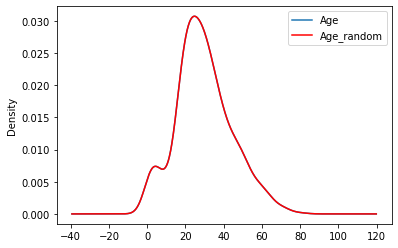

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde',ax=ax)
df['Age_random'].plot(kind='kde',ax=ax, color='red')
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables, loc='best')
plt.show()

we can see in the above figure that the distribution of Age and Age_random are coninsided (means there is no change in the variance of Feature after filling Na's)

This below figure is showing the difference between  distribution in the previous technique and the current technique

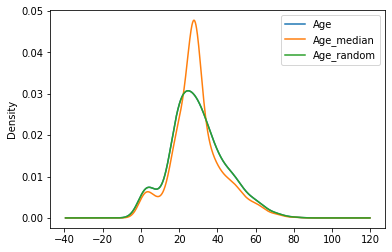

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax)
df['Age_random'].plot(kind='kde',ax=ax)
lines, lables = ax.get_legend_handles_labels()  
ax.legend(lines, lables, loc='best')
plt.show()

##Advantages
1. Easy To implement
2. There is less distortion in variance
##Disadvantage
1. In every situation randomness won't work

#

#Capturing NAN values with a new feature
It works well if the data are missing  not at random (MNAR)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Feature Engineering/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
import numpy as np
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0)    #replacing NaN values and Non null values with 1 and 0 respectively in Age

In [ ]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
df.Age_NaN.value_counts()   # we can see there are 177 NaN values

0    714
1    177
Name: Age_NaN, dtype: int64

In [ ]:
df.Age.median()

28.0

In [ ]:
df.Age.fillna(df.Age.median(),inplace = True)   #replacing the NaN values in 

In [ ]:
df.head(20)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


##Advantages
1. Easy to implement
2. Captures the importance of missing values
##Disadvantages
3. Creating Additional Features(Curse of Dimensionality)

#

#End of Distribution imputation

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Feature Engineering/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
extreme = df.Age.mean()+3*df.Age.std()  #taking the value which has std of >3 (i.e End of distribution)
extreme

73.27860964406094

In [ ]:
median = df.Age.median()
median

28.0

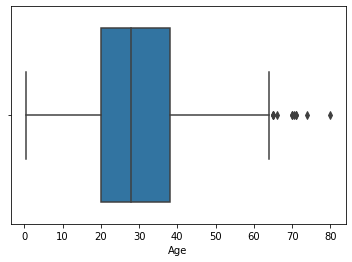

In [ ]:
import seaborn as sns
sns.boxplot(x='Age',data=df)   #checking the outliers
plt.show()

In [ ]:
def impute_nan(df,variable,extreme,median):
  df[variable+'_end_dist'] = df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',extreme,median)

In [ ]:
df.head(20)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


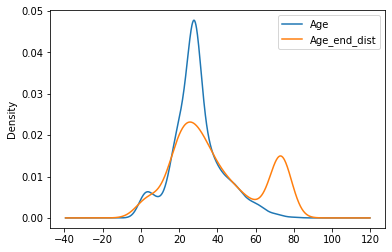

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind="kde",ax=ax)
df['Age_end_dist'].plot(kind='kde',ax=ax)
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines,lables)

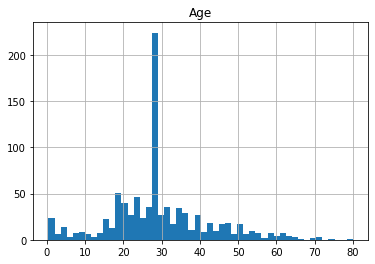

In [ ]:
df.hist('Age',bins=50)      #we can see high variance is at middle when filled Na's with median
plt.show()

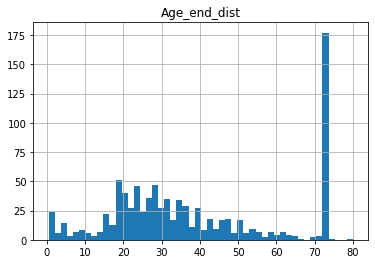

In [ ]:
df.hist('Age_end_dist',bins=50)    #we can see the high variance is at end when Na's are filled with End distribution(Extreme)
plt.show()

we can see the below box plot show that outliers are capture (i.e no outliers)

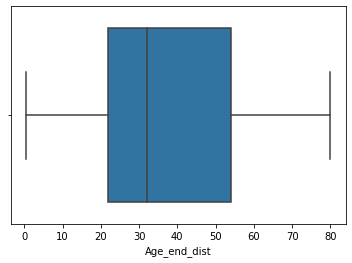

In [ ]:
sns.boxplot(x='Age_end_dist',data=df)   
plt.show()